In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from src.data.mnist import MNIST, get_mnist, get_rotated_mnist
from src.data.fmnist import FashionMNIST, get_fmnist, get_rotated_fmnist
from src.data.cifar10 import get_cifar10, get_cifar10_corrupted
from src.data.cifar100 import get_cifar100
from src.data.svhn import get_svhn
from src.data import get_dataloaders

In [7]:
train_set, val_set, test_set = get_dataloaders("CIFAR-100")
for batch in test_set:
    print(batch['image'].shape)
    print(batch['label'].shape)
    break

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
(128, 32, 32, 3)
(128, 100)


# Test subsampling

Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: /dtu/p1/hroy/data/train_32x32.mat
Dataset shape (15, 28, 28, 1) (15, 3)


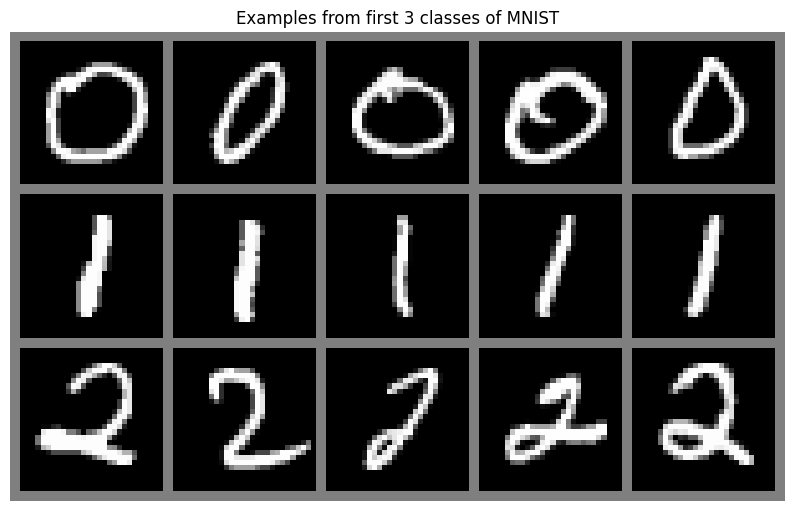

Dataset shape (15, 28, 28, 1) (15, 3)


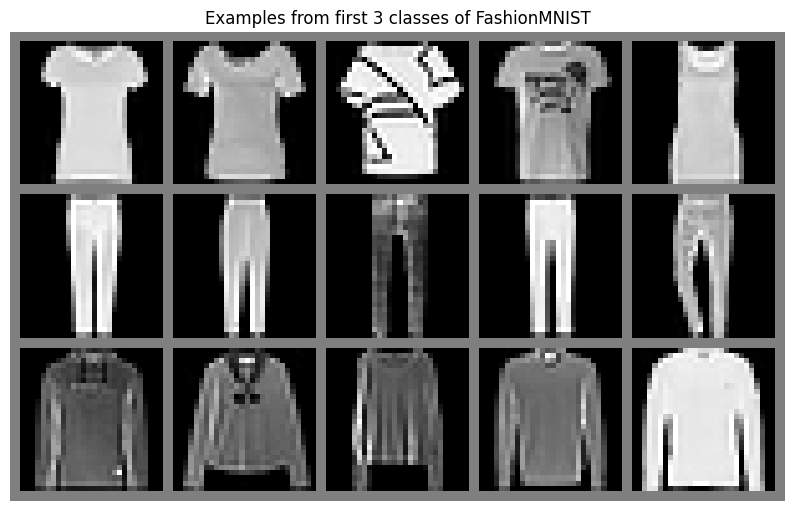

Dataset shape (15, 32, 32, 3) (15, 3)


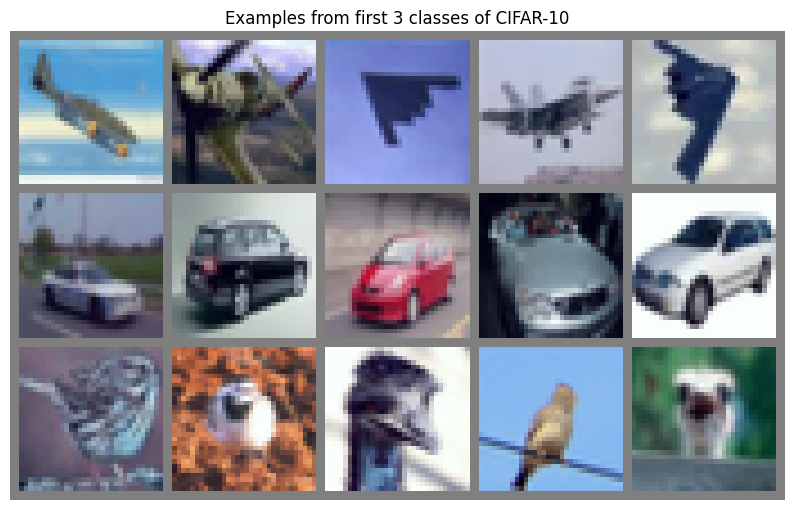

Dataset shape (15, 32, 32, 3) (15, 3)


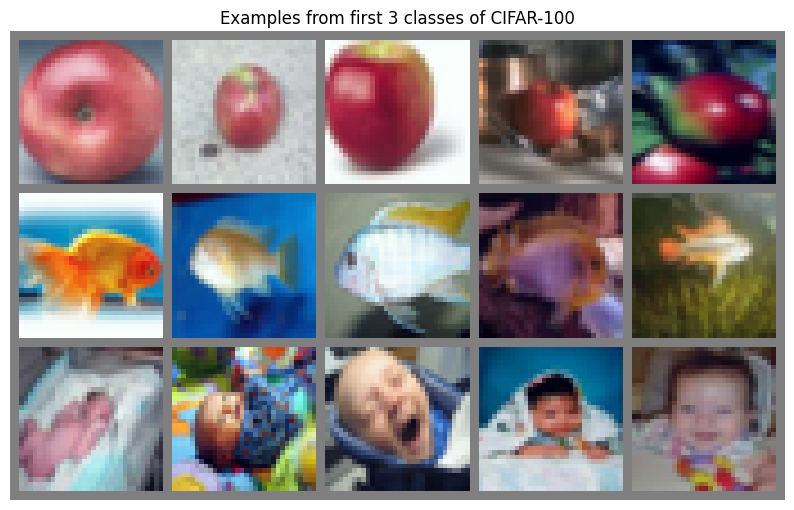

Dataset shape (15, 32, 32, 3) (15, 3)


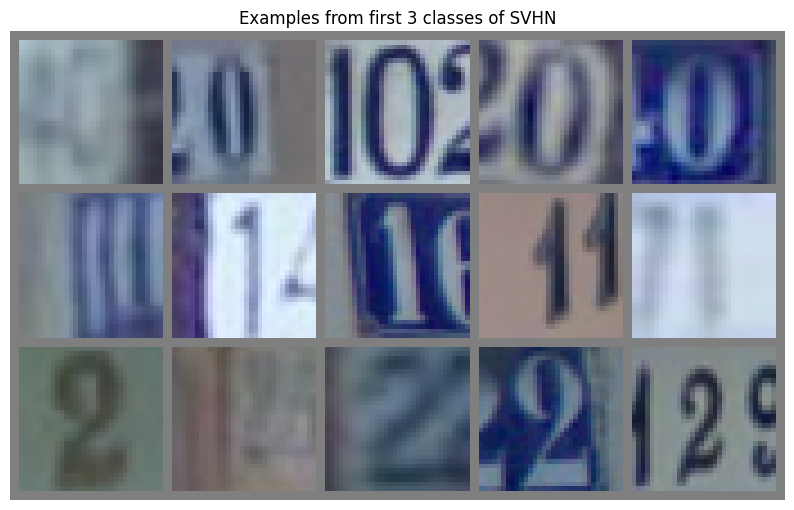

In [2]:
NUM_IMAGES_PER_CLASS = 5
NUM_CLASSES = 3

type_and_datasets = [
    ("MNIST",           MNIST(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("FashionMNIST",    FashionMNIST(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("CIFAR-10",        get_cifar10(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("CIFAR-100",       get_cifar100(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
    ("SVHN",            SVHN(n_samples_per_class=NUM_IMAGES_PER_CLASS, classes=list(range(NUM_CLASSES)))),
]

for dataset_type, dataset in type_and_datasets:
    print("Dataset shape", dataset.data.shape, dataset.targets.shape)
    images = [dataset.data[idx] for idx in range(NUM_IMAGES_PER_CLASS*NUM_CLASSES)]
    imgs = np.stack(images, axis=0)
    imgs = torch.from_numpy(imgs).permute(0, 3, 1, 2)
    img_grid = torchvision.utils.make_grid(imgs, nrow=NUM_IMAGES_PER_CLASS, normalize=True, pad_value=0.5)
    img_grid = img_grid.permute(1, 2, 0)

    plt.figure(figsize=(10,7))
    plt.title(f"Examples from first {NUM_CLASSES} classes of {dataset_type}")
    plt.imshow(img_grid)
    plt.axis('off')
    plt.show()
    plt.close()

# Test dataloaders

/dtu/p1/hroy/projected-bayes/src/data/mnist.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.targets = torch.nn.functional.one_hot(torch.tensor(self.targets), len(classes)).numpy()
/dtu/p1/hroy/projected-bayes/src/data/fmnist.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.targets = torch.nn.functional.one_hot(torch.tensor(self.targets), len(classes)).numpy()


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: /dtu/p1/hroy/data/train_32x32.mat
Using downloaded and verified file: /dtu/p1/hroy/data/test_32x32.mat
Using downloaded and verified file: /dtu/p1/hroy/data/train_32x32.mat
Using downloaded and verified file: /dtu/p1/hroy/data/test_32x32.mat
Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.1286])
Batch std tensor([0.3060])


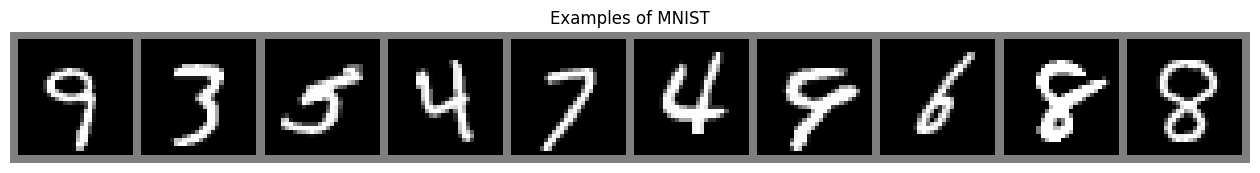

Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.1281])
Batch std tensor([0.3053])


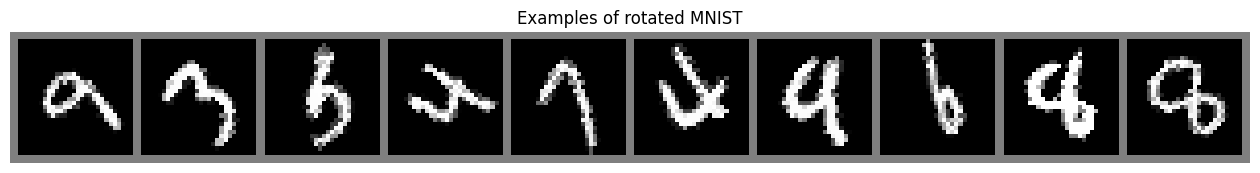

Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.2968])
Batch std tensor([0.3564])


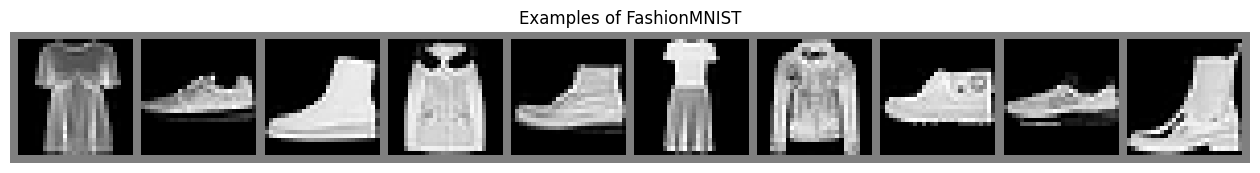

Batch shape torch.Size([128, 28, 28, 1])
Batch mean tensor([0.2907])
Batch std tensor([0.3558])


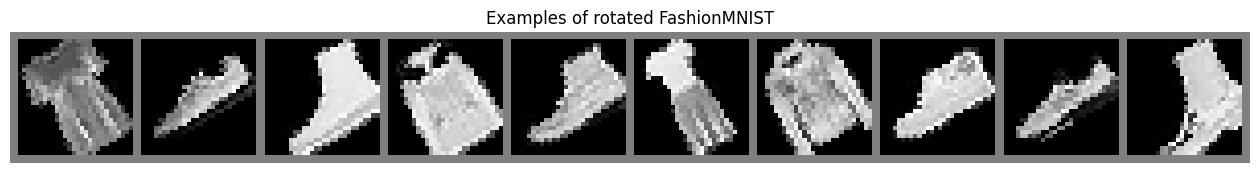

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([ 0.0174, -0.0062, -0.0266])
Batch std tensor([0.9863, 1.0060, 1.0073])


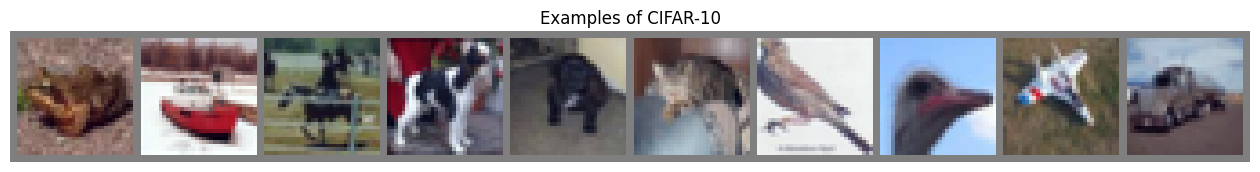

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([ 0.0105, -0.0180, -0.0381])
Batch std tensor([0.9574, 0.9774, 0.9816])


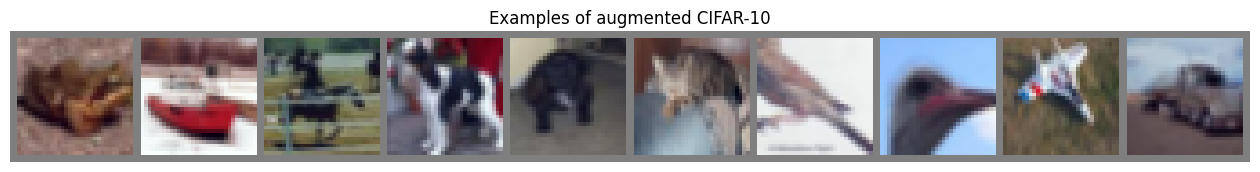

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.0265, -0.0258, -0.0367])
Batch std tensor([0.9917, 1.0039, 0.9952])


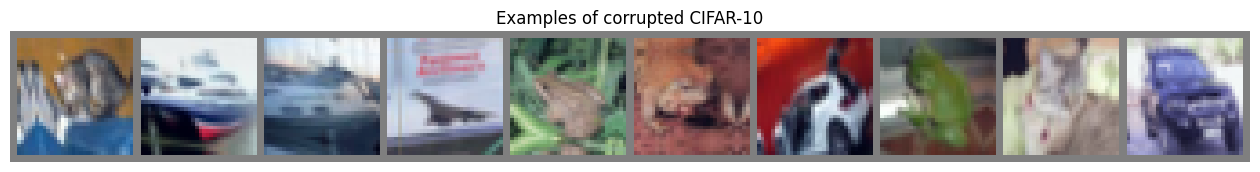

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([ 0.2630,  0.0453, -0.0809])
Batch std tensor([1.0788, 1.0750, 1.0182])


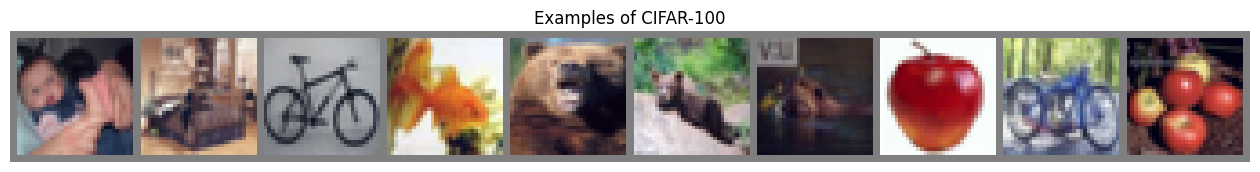

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([ 0.2644,  0.0342, -0.1013])
Batch std tensor([1.0509, 1.0447, 0.9896])


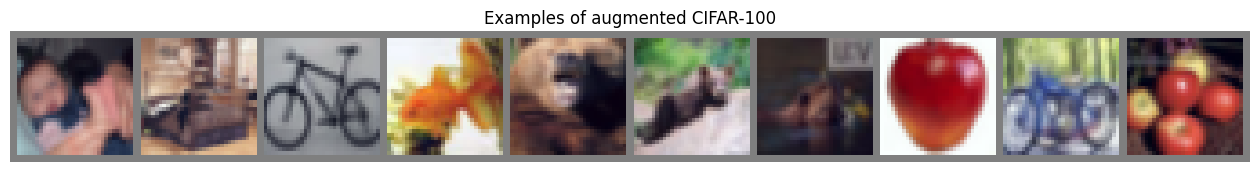

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.1670, -0.0287,  0.3055])
Batch std tensor([0.9123, 0.9646, 0.9531])


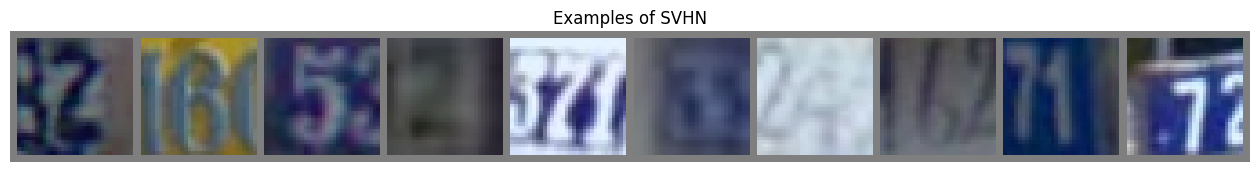

Batch shape torch.Size([128, 32, 32, 3])
Batch mean tensor([-0.1690, -0.0271,  0.3123])
Batch std tensor([0.9030, 0.9530, 0.9457])


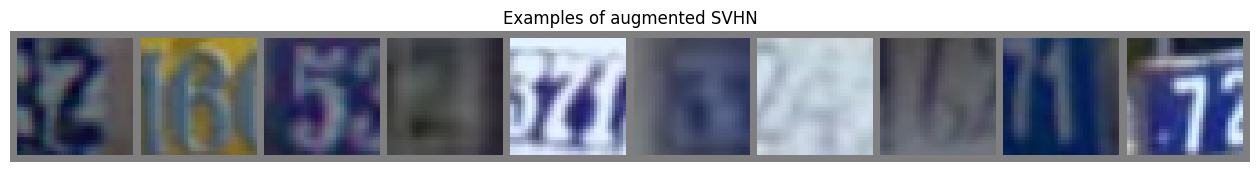

In [6]:
NUM_IMAGES = 10
NUM_COLUMNS = 10

type_and_loaders = [
    ("MNIST", get_mnist(batch_size = 128)),
    ("rotated MNIST", get_rotated_mnist(angle = 50, batch_size = 128)),
    ("FashionMNIST", get_fmnist(batch_size = 128)),
    ("rotated FashionMNIST", get_rotated_fmnist(angle = 30, batch_size = 128)),
    ("CIFAR-10", get_cifar10(batch_size = 128)),
    ("augmented CIFAR-10", get_cifar10(batch_size = 128)),
    ("corrupted CIFAR-10", get_cifar10_corrupted("elastic_transform", severity_level=1, batch_size = 128)),
    ("CIFAR-100", get_cifar100(batch_size = 128)),
    ("augmented CIFAR-100", get_cifar100(batch_size = 128)),
    ("SVHN", get_svhn(batch_size = 128)),
    ("augmented SVHN", get_svhn(batch_size = 128)),
]

for dataset_type, loader in type_and_loaders:
    train_loader, valid_loader, test_loader = loader
    if dataset_type == "corrupted CIFAR-10":
        train_loader = test_loader

    imgs, _ = next(iter(train_loader))
    print("Batch shape", imgs.shape)
    print("Batch mean", imgs.mean(axis=(0,1,2)))
    print("Batch std", imgs.std(axis=(0,1,2)))

    images = [train_loader.dataset[idx][0] for idx in range(NUM_IMAGES)]
    imgs = np.stack(images, axis=0)
    imgs = torch.from_numpy(imgs).permute(0, 3, 1, 2)
    img_grid = torchvision.utils.make_grid(imgs, nrow=NUM_COLUMNS, normalize=True, pad_value=0.5)
    img_grid = img_grid.permute(1, 2, 0)

    plt.figure(figsize=(16,5))
    plt.title(f"Examples of {dataset_type}")
    plt.imshow(img_grid)
    plt.axis('off')
    plt.show()
    plt.close()